<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modelling-for-UCLA-District" data-toc-modified-id="Modelling-for-UCLA-District-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modelling for UCLA District</a></span><ul class="toc-item"><li><span><a href="#AutoML" data-toc-modified-id="AutoML-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>AutoML</a></span></li><li><span><a href="#Stacked-Ensemble" data-toc-modified-id="Stacked-Ensemble-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Stacked Ensemble</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Support-Vector-Regression-(SVR)" data-toc-modified-id="Support-Vector-Regression-(SVR)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Support Vector Regression (SVR)</a></span></li></ul></li><li><span><a href="#Modelling-for-USC-District" data-toc-modified-id="Modelling-for-USC-District-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modelling for USC District</a></span><ul class="toc-item"><li><span><a href="#AutoML" data-toc-modified-id="AutoML-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>AutoML</a></span></li><li><span><a href="#Stacked-Ensemble" data-toc-modified-id="Stacked-Ensemble-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Stacked Ensemble</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Support-Vector-Regression-(SVR)" data-toc-modified-id="Support-Vector-Regression-(SVR)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Support Vector Regression (SVR)</a></span></li></ul></li></ul></div>

In [17]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# More Data Preprocessing & Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize

import warnings
warnings.filterwarnings('ignore') 

## Modelling for UCLA District

In [18]:
X_train_ucla = pd.read_csv('X_train_ucla.csv')
X_train_ucla = X_train_ucla.rename(columns={'Unnamed: 0': 'index'})
X_train_ucla.index = X_train_ucla['index']
X_train_ucla = X_train_ucla.drop('index',axis=1)

In [19]:
X_test_ucla = pd.read_csv('X_test_ucla.csv')
X_test_ucla = X_test_ucla.rename(columns={'Unnamed: 0': 'index'})
X_test_ucla.index = X_test_ucla['index']
X_test_ucla = X_test_ucla.drop('index',axis=1)

In [20]:
y_train_ucla = pd.read_csv('y_train_ucla.csv')
y_train_ucla.index = X_train_ucla.index
y_train_ucla = y_train_ucla.drop('Unnamed: 0',axis=1)

In [21]:
y_test_ucla = pd.read_csv('y_test_ucla.csv')
y_test_ucla.index = X_test_ucla.index
y_test_ucla = y_test_ucla.drop('Unnamed: 0',axis=1)

In [22]:
# TO DO: check the state of GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Mar  4 19:31:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    33W / 250W |    291MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# pip install h2o

### AutoML

In [27]:
# TO DO: prepare for h2o
import h2o
h2o.init(max_mem_size='10g')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq7f7l3zn
  JVM stdout: /tmp/tmpq7f7l3zn/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpq7f7l3zn/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_bhgpys
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,10 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [30]:
XY_train_ucla = pd.concat([y_train_ucla,X_train_ucla], axis=1)
XY_test_ucla = pd.concat([y_test_ucla,X_test_ucla], axis=1)

In [31]:
#TO DO: convert data to h2o df
train = h2o.H2OFrame(XY_train_ucla)
test = h2o.H2OFrame(XY_test_ucla)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
#TO DO: prepare h2o objects
y = '0'
x = train.columns
x.remove(y)

In [33]:
# build autoML
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=600,
         stopping_metric='MAE',
         nfolds=5,seed=99,
         include_algos = ["DRF","XGBoost","StackedEnsemble","GLM"],
         max_models = 10)

In [ ]:
# TO DO: train models
%time aml.train(x=x, y=y, training_frame=train)

In [35]:
# TO DO: show the leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_6_AutoML_1_20220304_193526,1,1,1,0.642982,nan
StackedEnsemble_BestOfFamily_7_AutoML_1_20220304_193526,1.00002,1.00001,1.00002,0.642985,nan
StackedEnsemble_BestOfFamily_3_AutoML_1_20220304_193526,1.00003,1.00002,1.00003,0.643003,nan
StackedEnsemble_BestOfFamily_4_AutoML_1_20220304_193526,1.00006,1.00003,1.00006,0.643005,nan
StackedEnsemble_AllModels_2_AutoML_1_20220304_193526,1.00006,1.00003,1.00006,0.643001,nan
StackedEnsemble_AllModels_1_AutoML_1_20220304_193526,1.0001,1.00005,1.0001,0.64302,nan
StackedEnsemble_BestOfFamily_2_AutoML_1_20220304_193526,1.00011,1.00005,1.00011,0.642997,nan
StackedEnsemble_AllModels_3_AutoML_1_20220304_193526,1.00011,1.00005,1.00011,0.643001,nan
StackedEnsemble_BestOfFamily_1_AutoML_1_20220304_193526,1.00012,1.00006,1.00012,0.643034,nan
GLM_1_AutoML_1_20220304_193526,1.00177,1.00089,1.00177,0.643396,nan


### Stacked Ensemble

In [ ]:
# TO DO: obtain the best model
bst_model = aml.leader
bst_model.model_performance(test)

In [62]:
y_pred = pd.DataFrame(bst_model.predict(test)[0].as_data_frame().values)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [63]:
# TO DO: check testing set performance
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ucla, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ucla, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test_ucla, y_pred))

Mean Squared Error: 0.9549021799656747
Mean Absolute Error: 0.6387568948519549
Median Absolute Error: 0.5059533558929372


### XGBoost

In [60]:
model = h2o.get_model('XGBoost_grid_1_AutoML_1_20220304_193526_model_4')
y_pred = pd.DataFrame(model.predict(test)[0].as_data_frame().values)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [61]:
# TO DO: check testing set performance
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ucla, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ucla, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test_ucla, y_pred))

Mean Squared Error: 0.9635242398198685
Mean Absolute Error: 0.6430272218451674
Median Absolute Error: 0.5087322558958639


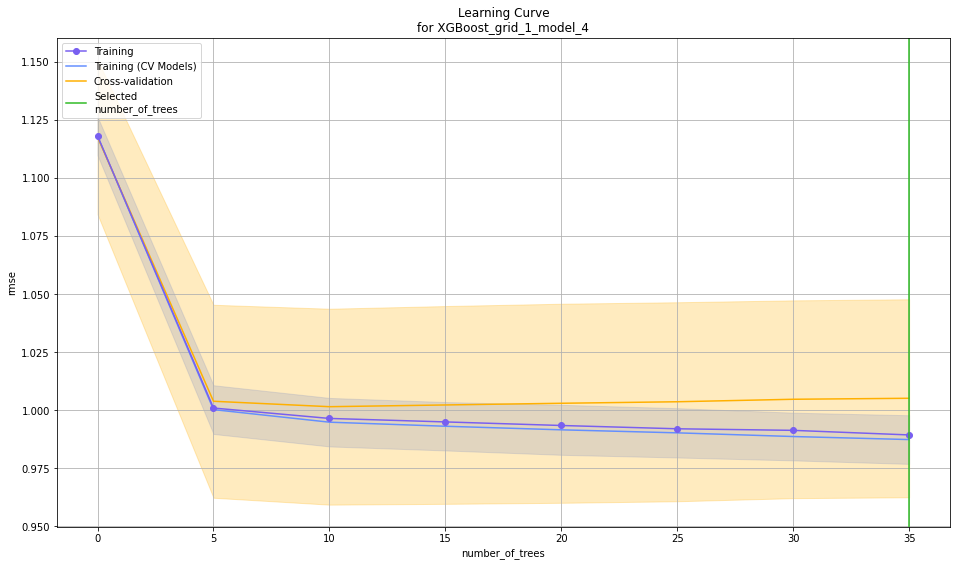

In [51]:
learning_curve_plot = model.learning_curve_plot()

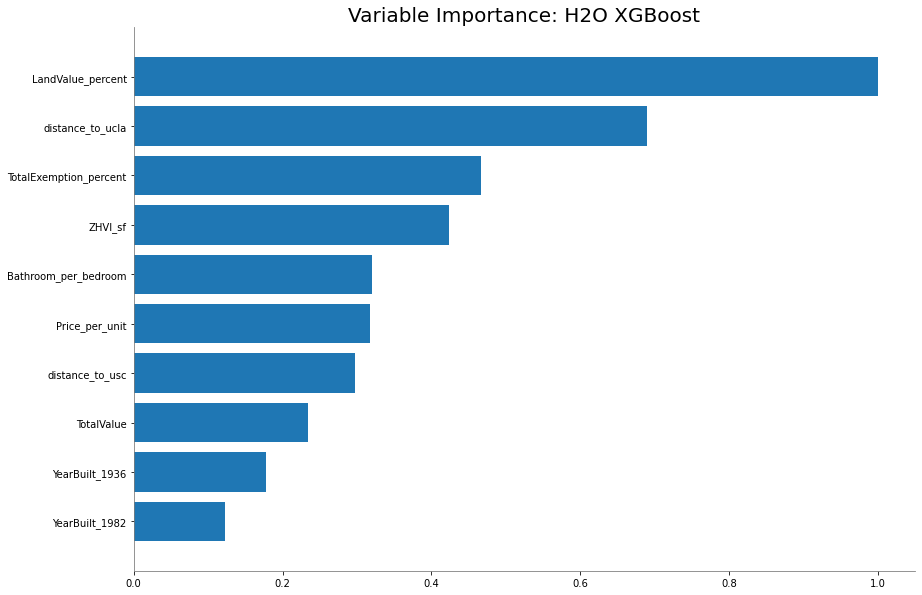

<Figure size 432x288 with 0 Axes>

In [52]:
ra_plot = model.varimp_plot()

### Random Forest

In [58]:
model = h2o.get_model('DRF_1_AutoML_1_20220304_193526')
y_pred = pd.DataFrame(model.predict(test)[0].as_data_frame().values)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [59]:
# TO DO: check testing set performance
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ucla, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ucla, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test_ucla, y_pred))

Mean Squared Error: 0.9801925852069605
Mean Absolute Error: 0.6494528681812309
Median Absolute Error: 0.5129556946763333


### KNN 

In [26]:
# TO DO: implement 5-fold cross-validation for parameter tuning
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # RandomizedSearchCV is faster

param_dist = {'n_neighbors': [5, 10, 30, 50, 70, 100]}
regressor = KNeighborsRegressor()
grid = GridSearchCV(regressor, param_dist, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)

grid.fit(X_train_ucla, y_train_ucla) # no need for normalization
grid.best_estimator_

KNeighborsRegressor(n_neighbors=100)

In [56]:
# TO DO: train the model with optimal parameters
regressor_knn = KNeighborsRegressor(n_neighbors=100)
regressor_knn.fit(X_train_ucla, y_train_ucla)
y_pred = regressor_knn.predict(X_test_ucla)

In [57]:
# TO DO: check testing set performance
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ucla, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ucla, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test_ucla, y_pred))

Mean Squared Error: 0.9630598835101957
Mean Absolute Error: 0.6445714315916161
Median Absolute Error: 0.5087309897884507


### Support Vector Regression (SVR)

In [53]:
# TO DO: implement 5-fold cross-validation for parameter tuning
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # RandomizedSearchCV is faster

param_dist = {'C': [0.1, 0.5, 1]}
regressor_svr = SVR(kernel='rbf',gamma=1/X_train_ucla.shape[1])
grid = GridSearchCV(regressor_svr, param_dist, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)

grid.fit(X_train_ucla, y_train_ucla)
grid.best_estimator_

SVR(C=0.1, gamma=0.006329113924050633)

In [54]:
# TO DO: train the model with optimal parameters
regressor_svr = SVR(C=0.1, kernel='rbf', gamma=1/X_train_ucla.shape[1])
regressor_svr.fit(X_train_ucla, y_train_ucla)
y_pred = regressor_svr.predict(X_test_ucla)

In [55]:
# TO DO: check testing set performance
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ucla, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ucla, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test_ucla, y_pred))

Mean Squared Error: 0.9759420644491487
Mean Absolute Error: 0.6304210948921417
Median Absolute Error: 0.4827779891066538


In [ ]:
# TO DO: output the predictions
y_pred_svr_ucla = y_pred
pd.DataFrame(y_pred_svr_ucla).to_csv('y_pred_svr_ucla.csv')

## Modelling for USC District

In [88]:
X_train_usc = pd.read_csv('X_train_usc.csv')
X_train_usc = X_train_usc.rename(columns={'Unnamed: 0': 'index'})
X_train_usc.index = X_train_usc['index']
X_train_usc = X_train_usc.drop('index',axis=1)

In [89]:
X_test_usc = pd.read_csv('X_test_usc.csv')
X_test_usc = X_test_usc.rename(columns={'Unnamed: 0': 'index'})
X_test_usc.index = X_test_usc['index']
X_test_usc = X_test_usc.drop('index',axis=1)

In [90]:
y_train_usc = pd.read_csv('y_train_usc.csv')
y_train_usc.index = X_train_usc.index
y_train_usc = y_train_usc.drop('Unnamed: 0',axis=1)

In [91]:
y_test_usc = pd.read_csv('y_test_usc.csv')
y_test_usc.index = X_test_usc.index
y_test_usc = y_test_usc.drop('Unnamed: 0',axis=1)

In [92]:
XY_train_usc = pd.concat([y_train_usc,X_train_usc], axis=1)
XY_test_usc = pd.concat([y_test_usc,X_test_usc], axis=1)

### AutoML

In [94]:
#TO DO: convert data to h2o df
train_usc = h2o.H2OFrame(XY_train_usc)
test_usc = h2o.H2OFrame(XY_test_usc)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [95]:
#TO DO: prepare h2o objects
y = '0'
x = train_usc.columns
x.remove(y)

In [96]:
# build autoML
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=600,
         stopping_metric='MAE',
         nfolds=5,seed=99,
         include_algos = ["DRF","XGBoost","StackedEnsemble","GLM"],
         max_models = 10)

In [ ]:
# TO DO: train models
%time aml.train(x=x, y=y, training_frame=train_usc)

In [102]:
# TO DO: show the leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_7_AutoML_3_20220304_202900,1.00003,1.00002,1.00003,0.692572,nan
StackedEnsemble_AllModels_6_AutoML_3_20220304_202900,1.00004,1.00002,1.00004,0.692567,nan
StackedEnsemble_BestOfFamily_3_AutoML_3_20220304_202900,1.00005,1.00003,1.00005,0.692569,nan
StackedEnsemble_BestOfFamily_2_AutoML_3_20220304_202900,1.00005,1.00003,1.00005,0.692566,nan
StackedEnsemble_BestOfFamily_1_AutoML_3_20220304_202900,1.00007,1.00003,1.00007,0.692572,nan
StackedEnsemble_BestOfFamily_4_AutoML_3_20220304_202900,1.00008,1.00004,1.00008,0.692583,nan
StackedEnsemble_AllModels_3_AutoML_3_20220304_202900,1.00012,1.00006,1.00012,0.692595,nan
StackedEnsemble_AllModels_2_AutoML_3_20220304_202900,1.00012,1.00006,1.00012,0.692602,nan
StackedEnsemble_AllModels_1_AutoML_3_20220304_202900,1.00014,1.00007,1.00014,0.692615,nan
GLM_1_AutoML_3_20220304_202900,1.00074,1.00037,1.00074,0.692834,nan


### Stacked Ensemble

In [103]:
# TO DO: obtain the best model
bst_model = aml.leader
bst_model.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.954902176130438
RMSE: 0.9771909619569954
MAE: 0.6387568947805948
RMSLE: NaN
R^2: -1.2741718689035508e-06
Mean Residual Deviance: 0.954902176130438
Null degrees of freedom: 9540
Residual degrees of freedom: 9540
Null deviance: 9110.72166246051
Residual deviance: 9110.72166246051
AIC: 26639.902506516017


In [104]:
y_pred = pd.DataFrame(bst_model.predict(test_usc)[0].as_data_frame().values)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [105]:
# TO DO: check testing set performance
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_usc, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_usc, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test_usc, y_pred))

Mean Squared Error: 0.9761092051416553
Mean Absolute Error: 0.7021524895587913
Median Absolute Error: 0.5396015678765905


### XGBoost

In [108]:
model = h2o.get_model('XGBoost_grid_1_AutoML_3_20220304_202900_model_4')
y_pred = pd.DataFrame(model.predict(test_usc)[0].as_data_frame().values)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [109]:
# TO DO: check testing set performance
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_usc, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_usc, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test_usc, y_pred))

Mean Squared Error: 0.9926590833773318
Mean Absolute Error: 0.7061981139897315
Median Absolute Error: 0.5405715312782617


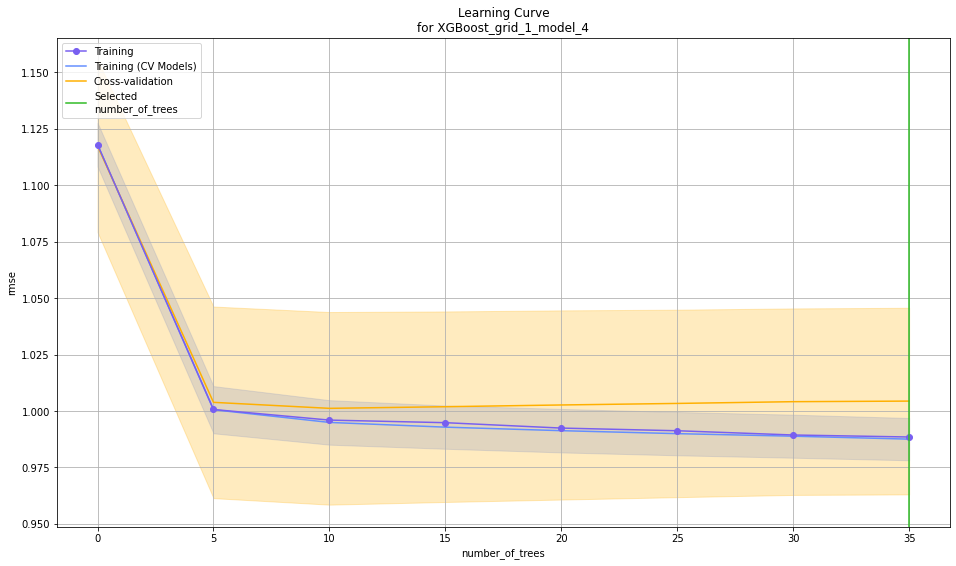

In [110]:
# TO DO: plot learning curve
learning_curve_plot = model.learning_curve_plot()

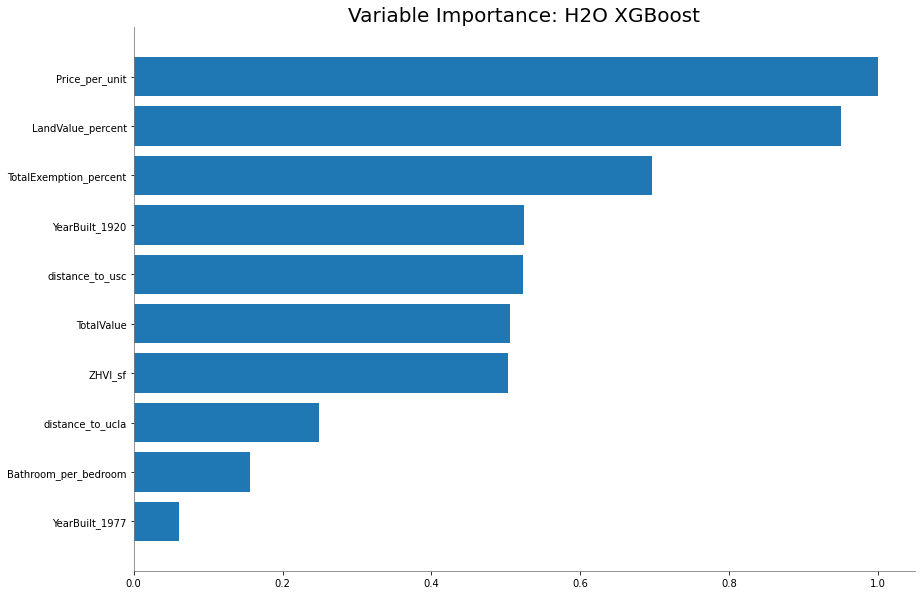

<Figure size 432x288 with 0 Axes>

In [111]:
# TO DO: plot features importance
ra_plot = model.varimp_plot()

### Random Forest

In [112]:
model = h2o.get_model('DRF_1_AutoML_3_20220304_202900')
y_pred = pd.DataFrame(model.predict(test_usc)[0].as_data_frame().values)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [113]:
# TO DO: check testing set performance
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_usc, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_usc, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test_usc, y_pred))

Mean Squared Error: 0.9878338743084581
Mean Absolute Error: 0.7055478693474305
Median Absolute Error: 0.5401540962742152


### KNN

In [114]:
# TO DO: implement 5-fold cross-validation for parameter tuning
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # RandomizedSearchCV is faster

param_dist = {'n_neighbors': [5, 10, 30, 50, 70, 100]}
regressor = KNeighborsRegressor()
grid = GridSearchCV(regressor, param_dist, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)

grid.fit(X_train_usc, y_train_usc) # no need for normalization
grid.best_estimator_

KNeighborsRegressor(n_neighbors=100)

In [115]:
# TO DO: train the model with optimal parameters
regressor_knn = KNeighborsRegressor(n_neighbors=100)
regressor_knn.fit(X_train_usc, y_train_usc)
y_pred = regressor_knn.predict(X_test_usc)

In [116]:
# TO DO: check testing set performance
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_usc, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_usc, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test_usc, y_pred))

Mean Squared Error: 0.9845469081759427
Mean Absolute Error: 0.7071337127751335
Median Absolute Error: 0.5477331587047735


### Support Vector Regression (SVR)

In [117]:
# TO DO: implement 5-fold cross-validation for parameter tuning
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # RandomizedSearchCV is faster

param_dist = {'C': [0.1, 0.5, 1]}
regressor_svr = SVR(kernel='rbf',gamma=1/X_train_usc.shape[1])
grid = GridSearchCV(regressor_svr, param_dist, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)

grid.fit(X_train_usc, y_train_usc)
grid.best_estimator_

SVR(C=0.1, gamma=0.005649717514124294)

In [118]:
# TO DO: train the model with optimal parameters
regressor_svr = SVR(C=0.1, kernel='rbf', gamma=1/X_train_usc.shape[1])
regressor_svr.fit(X_train_usc, y_train_usc)
y_pred = regressor_svr.predict(X_test_usc)

In [119]:
# TO DO: check testing set performance
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_usc, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_usc, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test_usc, y_pred))

Mean Squared Error: 1.0518088884251604
Mean Absolute Error: 0.6634610803451184
Median Absolute Error: 0.4215077149748766


In [ ]:
# TO DO: output the predictions
y_pred_svr_usc = y_pred
pd.DataFrame(y_pred_svr_usc).to_csv('y_pred_svr_usc.csv')